# Imports

In [372]:
import os
import hashlib
from itertools import permutations
import matplotlib.pyplot as plt

# Task 1: Binary Representations

For this task, I have to create certain functions and demonstrate their use with examples. These functions are:

---

1. The function rotl(x, n=1) that rotates the bits in a 32-bit unsigned integer to the left n places.

In [373]:
def rotl(x, n=1):
    # Perform bitwise rotation to the left by n positions
    return ((x << n) & 0xFFFFFFFF) | (x >> (32 - n))

# Example test case:
x = 0b10110011001011101011001100101101
rotated = rotl(x, 4)
print(f"rotl(0b{x:032b}, 4) = 0b{rotated:032b}")

rotl(0b10110011001011101011001100101101, 4) = 0b00110010111010110011001011011011


2. The function rotr(x, n=1) that rotates the bits in a 32-bit unsigned integer to the right n places.

In [374]:
def rotr(x, n=1):
    # Perform bitwise rotation to the right by n positions
    return (x >> n) | ((x << (32 - n)) & 0xFFFFFFFF)

# Example test case:
x = 0b10110011001011101011001100101101
rotated = rotr(x, 4)
print(f"rotr(0b{x:032b}, 4) = 0b{rotated:032b}")

rotr(0b10110011001011101011001100101101, 4) = 0b11011011001100101110101100110010


3. The function ch(x, y, z) that chooses the bits from y where x has bits set to 1 and bits in z where x has bits set to 0.

In [375]:
def ch(x, y, z):
    # Perform the 'choose' operation based on bits of x
    return (x & y) ^ (~x & z)

# Example test case:
x = 0b10101010101010101010101010101010
y = 0b11110000111100001111000011110000
z = 0b00001111000011110000111100001111
chosen = ch(x, y, z)
print(f"ch(0b{x:032b}, 0b{y:032b}, 0b{z:032b}) = 0b{chosen:032b}")

ch(0b10101010101010101010101010101010, 0b11110000111100001111000011110000, 0b00001111000011110000111100001111) = 0b10100101101001011010010110100101


4. The function maj(x, y, z) which takes a majority vote of the bits in x, y, and z.
The output should have a 1 in bit position i where at least two of x, y, and z have 1's in position i.
All other output bit positions should be 0.

In [376]:
def maj(x, y, z):
    # Majority vote between x, y, and z for each bit position
    return (x & y) | (x & z) | (y & z)

# Example test case:
x = 0b11001100110011001100110011001100
y = 0b10101010101010101010101010101010
z = 0b01111000011110000111100001111000
majority = maj(x, y, z)
print(f"maj(0b{x:032b}, 0b{y:032b}, 0b{z:032b}) = 0b{majority:032b}")

maj(0b11001100110011001100110011001100, 0b10101010101010101010101010101010, 0b01111000011110000111100001111000) = 0b11101000111010001110100011101000


# Task 2: Hash Functions

For this task, I was given the following hash function from The C Programming Language by Brian Kernighan and Dennis Ritchie.

```
unsigned hash(char *s) {
    unsigned hashval;
    for (hashval = 0; *s != '\0'; s++)
        hashval = *s + 31 * hashval;
    return hashval % 101;
}
```

My task is to convert it to Python, test it, and suggest why the values 31 and 101 are used.

---

In [377]:
def hash(s):
    hashvalue = 0
    for char in s:
        hashvalue = ord(char) + 31 * hashvalue
    return hashvalue % 101

# Example test case:
test = ["hello", "dog", "cat", "test", "example", ""]

for s in test:
    print(f"Hash value for '{s}' = {hash(s)}")

Hash value for 'hello' = 17
Hash value for 'dog' = 58
Hash value for 'cat' = 90
Hash value for 'test' = 86
Hash value for 'example' = 28
Hash value for '' = 0


Why the values 31 and 101 are used:

31:
The value 31 is commonly used in hash functions because it is a prime number, which helps reduce the likelihood of collisions in hash tables. It is a small prime number, which helps in spreading hash values uniformly.

101:
The value 101 is used as the modulus to ensure the hash value fits within a specific range (0 to 100).

# Task 3: SHA256

For this task, I have to write a Python function that calculates the SHA256 padding for a given file.<br>
The function should take a file path as input.<br>
It should print, in hex, the padding that would be applied to it.<br>
The [specification](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf) states that the following should be appended to a message:

- a1 bit;
- enough 0 bits so the length in bits of padded message is the smallest possible multiple of 512;
- the length in bits of the original input as a big-endian 64-bit unsigned integer.

The example in the specification is a file containing the three bytes "abc":

01100001 01100010 01100011

The output would be:

80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00
00 00 00 00 00 00 00 00 18

---

This script reads the contents of a file and computes the SHA-256 padding that would be added before hashing the data. The padding is then printed in hex format.

In [378]:
def sha256(file_path):
    with open(file_path, 'rb') as f:
        data = f.read()

    original_length = len(data)
    bit_length = original_length * 8

    # Start with the 0x80 byte (the '1' bit followed by seven 0s)
    padding = b'\x80'

    # Calculate how many zero bytes are needed to reach 56 mod 64
    total_length = original_length + 1
    
    padding_zeros = (56 - total_length % 64) % 64

    padding += b'\x00' * padding_zeros

    # Append the original message length as a 64-bit (8 bytes) big-endian integer
    padding += bit_length.to_bytes(8, byteorder='big')

    # Print the padding in hex format
    print(' '.join(f'{byte:02x}' for byte in padding))

# Run:
sha256("task3.txt") # Default file path, contains three bytes "abc"


80 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 18


# Task 4: Prime Numbers

For this task, I have to calculate the first 100 prime numbers using two different algorithms.<br>
Any algorithms that are well-established and works correctly are okay to use.<br>
I then have to explain how the algorithms work.

---

## Algorithm 1: Sieve Of Eratosthenes

The Sieve of Eratosthenes works by iteratively marking the multiples of each prime starting from 2, marking them as non-prime, and continuing this process up to sqrt(n), leaving only the prime numbers unmarked.<br>
The sieve of Eratosthenes is one of the most efficient ways to find all prime numbers smaller than n when n is smaller than 10 million or so.<br>
(Adapted from [geeksforgeeks](https://www.geeksforgeeks.org/sieve-of-eratosthenes/))

In [379]:
def SieveOfEratosthenes(count):
    # For 100 primes, 550 is sufficient
    n = 550  
    while True:
        # Create sieve
        prime = [True for _ in range(n + 1)]
        prime[0:2] = [False, False]
        p = 2
        while (p * p <= n):
            if prime[p]:
                for i in range(p * p, n + 1, p):
                    prime[i] = False
            p += 1

        # Collect primes in a list
        primes = []
        for p in range(n + 1):
            if prime[p]:
                primes.append(p)
        
        # If enough is found, break
        if len(primes) >= count:
            break

    # Print in rows of 10 (easier to read)
    for i in range(0, count, 10):
        print(" ".join(f"{p:3d}" for p in primes[i:i+10]))

# Run:
SieveOfEratosthenes(100)


  2   3   5   7  11  13  17  19  23  29
 31  37  41  43  47  53  59  61  67  71
 73  79  83  89  97 101 103 107 109 113
127 131 137 139 149 151 157 163 167 173
179 181 191 193 197 199 211 223 227 229
233 239 241 251 257 263 269 271 277 281
283 293 307 311 313 317 331 337 347 349
353 359 367 373 379 383 389 397 401 409
419 421 431 433 439 443 449 457 461 463
467 479 487 491 499 503 509 521 523 541


## Algorithm 2: Trial Division

Trial Division is the simplest and most straightforward method to check whether a number is prime. It involves dividing the number by all smaller numbers to see if it has any divisors other than 1 and itself.<br>
(Adapted from [geeksforgeeks](https://www.geeksforgeeks.org/trial-division-algorithm-for-prime-factorization/))

In [380]:
# Check if a number is a prime
def TrialDivision(N):
    if N < 2:
        return 0
    i = 2
    k = int(N ** 0.5)
    while i <= k:
        if N % i == 0:
            return 0
        i += 1
    return 1

# Find first 100 primes
def FindFirst100Primes():
    primes = []
    candidate = 2
    while len(primes) < 100:
        if TrialDivision(candidate):
            primes.append(candidate)
        candidate += 1

    # Print in rows of 10 (easier to read)
    for i in range(0, 100, 10):
        print(" ".join(f"{p:3d}" for p in primes[i:i+10]))

# Run:
FindFirst100Primes()

  2   3   5   7  11  13  17  19  23  29
 31  37  41  43  47  53  59  61  67  71
 73  79  83  89  97 101 103 107 109 113
127 131 137 139 149 151 157 163 167 173
179 181 191 193 197 199 211 223 227 229
233 239 241 251 257 263 269 271 277 281
283 293 307 311 313 317 331 337 347 349
353 359 367 373 379 383 389 397 401 409
419 421 431 433 439 443 449 457 461 463
467 479 487 491 499 503 509 521 523 541


# Task 5: Roots

For this task, I have to calculate the first 32 bits of the fractional part of the square roots of the first 100 prime numbers.<br>

---

For this task, I will use the Trial Division algorithm used in Task 4 above to calculate the first 100 prime numbers.<br>
(Adapted from [notes](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/cube_roots.ipynb))

In [381]:
# Check if a number is a prime
def TrialDivision(N):
    if N < 2:
        return 0
    i = 2
    k = int(N ** 0.5)
    while i <= k:
        if N % i == 0:
            return 0
        i += 1
    return 1

# Find first 100 primes
def FindFirst100Primes():
    primes = []
    candidate = 2
    while len(primes) < 100:
        if TrialDivision(candidate):
            primes.append(candidate)
        candidate += 1
    return primes

primes = FindFirst100Primes()
frac32 = []

for prime in primes:
    # Compute square root
    root = prime ** (1 / 2)
    # Modulo 1
    frac = root - int(root)
    # Move 32 bits in front of decimal point
    frac = frac * (2 ** 32)
    # Convert to integer
    bits = int(frac)
    # Append
    frac32.append((prime, bits))

# Print
for prime, bits in frac32:
    print(f"Prime: {prime:3d}, 32-bit fractional part of sqrt: {bits:032b}")

Prime:   2, 32-bit fractional part of sqrt: 01101010000010011110011001100111
Prime:   3, 32-bit fractional part of sqrt: 10111011011001111010111010000101
Prime:   5, 32-bit fractional part of sqrt: 00111100011011101111001101110010
Prime:   7, 32-bit fractional part of sqrt: 10100101010011111111010100111010
Prime:  11, 32-bit fractional part of sqrt: 01010001000011100101001001111111
Prime:  13, 32-bit fractional part of sqrt: 10011011000001010110100010001100
Prime:  17, 32-bit fractional part of sqrt: 00011111100000111101100110101011
Prime:  19, 32-bit fractional part of sqrt: 01011011111000001100110100011001
Prime:  23, 32-bit fractional part of sqrt: 11001011101110111001110101011101
Prime:  29, 32-bit fractional part of sqrt: 01100010100110100010100100101010
Prime:  31, 32-bit fractional part of sqrt: 10010001010110010000000101011010
Prime:  37, 32-bit fractional part of sqrt: 00010101001011111110110011011000
Prime:  41, 32-bit fractional part of sqrt: 01100111001100110010011001100111

# Task 6: Proof of Work

For this task, I have to find the word(s) in the English language with the greatest number of 0 bits at the beginning of their SHA256 hash digest.<br>
The word list I used for this task was "words.txt", the word list used in the emerging technologies module last semester.

---

This script finds the word from a dictionary file whose SHA-256 hash starts with the greatest number of leading zero bits. It takes a word, computes its SHA-256 hash, converts the resulting byte digest into a binary string, and counts the number of zero bits from the start of this string until the first one appears. It then iterates through each word in a given list, strips whitespace, and determines how many leading zeros its hash has. It tracks the word with the highest number of leading zero bits. Finally, the script reads all words from the file and prints out the word with the most leading zero bits and the corresponding count.

In [382]:
def leading_zero_bits(word):
    # Get SHA256 digest as bytes
    digest = hashlib.sha256(word.encode('utf-8')).digest()
    
    # Convert to binary string
    binary_str = ''.join(f'{byte:08b}' for byte in digest)
    
    # Count leading zeros
    return len(binary_str) - len(binary_str.lstrip('0'))

def find_words(word_list):
    max_zeros = 0
    best_word = []

    for word in word_list:
        word = word.strip()
        if not word:
            continue
        # Count the leading zero bits in the word's SHA-256 hash
        zero_bits = leading_zero_bits(word)
        # Update best word if a new max is found
        if zero_bits > max_zeros:
            max_zeros = zero_bits
            best_word = [word]
        elif zero_bits == max_zeros:
            best_word.append(word)
    
    return max_zeros, best_word

# Load words from a dictionary file
with open("words.txt", "r") as f:
    words = f.readlines()

# Find the words with the most leading zero bits
max_zeros, best_word = find_words(words)

print("Word with the greatest number of leading zero bits:")
for word in best_word:
    print(word)
print(f"Maximum leading zero bits: {max_zeros}")

Word with the greatest number of leading zero bits:
APPLICANT
Maximum leading zero bits: 16


Using the "words.txt" word list, the word with the greatest number of leading zero bits is "APPLICANT", with 16 leading zero bits.

# Task 7: Turing Machines

For this task, I have to design a Turing Machine that adds 1 to a binary number on its tape.<br>
The machine should start at the left-most non-blank symbol.<br>
It should treat the right-most symbol as the least significant bit.

For example, suppose the following is on the tape at the start:

100111

The Turing machine should leave the following on the tape when it completes:

101000

---

This Turing machine that performs binary incrementation. It adds 1 to a given binary number. The input is placed on a tape, and the machine follows transition rules defined in the state_table. Starting in state U, the machine moves right over the input until it finds a blank symbol, indicating the end of the binary number. It then transitions to state V and moves left, performing the addition. If it encounters a 1, it changes it to 0 (carrying the 1) and continues left. When it finds a 0 or reaches the start, it changes that to 1 and transitions to the final state F, completing the increment. For example, given the input '100111', the machine outputs '101000'.<br>
(Adapted from [notes](https://github.com/ianmcloughlin/computational_theory/blob/main/materials/turing_machines.ipynb))

In [383]:
initial_input = '100111'

state_table = {
    ('U', '0'): ('U', '0', 'R'),
    ('U', '1'): ('U', '1', 'R'),
    ('U', '_'): ('V', '_', 'L'),

    ('V', '0'): ('F', '1', 'R'),
    ('V', '1'): ('V', '0', 'L'),
    ('V', '_'): ('F', '1', 'R'),
}

In [384]:
def simulate(table, initial_input, verbose=True):
    """Simulate a Turing machine."""
    if verbose is True:
        print(f'Length of input: {len(initial_input)}')
    # Keep track of number of operations.
    no_ops = 0

    # Check for empty input.
    if initial_input == '':
        initial_input = '_'
    # Make input a list.
    tape = list(initial_input)
    # Initial position on the tape, convention.
    pos = 0

    # Initial state - note dictionaries preserve insertion.
    state = list(state_table.keys())[0][0]
    # All states in first column.
    states_1 = set(i[0] for i in state_table.keys())
    # All states in third column.
    states_3 = set([i[0] for i in state_table.values()])
    # Final states.
    F = states_3 - states_1

    if verbose is True:
        # Print starting config.
        print(state + ''.join(tape))

    # While not in a final state.
    while state not in F:
        # Get current symbol.
        symbol = tape[pos]
        # Get next state, symbol, and direction.
        state, tape[pos], direction = table[(state, symbol)]
        # Increment number of operations.
        no_ops += 1
        # Move cell.
        if direction == 'L':
            pos -= 1
        else:
            pos += 1
        # Fix problems with Python lists being finite
        if pos < 0:
            tape = [b] + tape
            pos = 0
        if pos == len(tape):
            tape.append('_')

        if verbose is True:
            # Print current configuration.
            print(''.join(tape[:pos]) + state + ''.join(tape[pos:]))

    if verbose is True:
        # Print number of operations.
        print(f'Number of operations: {no_ops}')
        
    # Strip blanks and return final tape
    tape_str = ''.join(tape).strip('_')
    print(f"Final binary number: {tape_str}")

    return state, tape_str

In [385]:
_, result = simulate(state_table, initial_input)

Length of input: 6
U100111
1U00111
10U0111
100U111
1001U11
10011U1
100111U_
10011V1_
1001V10_
100V100_
10V0000_
101F000_
Number of operations: 11
Final binary number: 101000


# Task 8: Computational Complexity

For this task, I have to implement bubble sort in Python, modifying it to count the number of comparisons made during sorting.<br>
I must use this function to sort all permutations of the list:

L = [1, 2, 3, 4, 5]

For each permutation, I have to print the permutation itself followed by the number of comparisons required to sort it.

---

Bubble Sort is the simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in the wrong order. 

- Bubble Sort algorithm, sorts an array by repeatedly comparing adjacent elements and swapping them if they are in the wrong order.
- The algorithm iterates through the array multiple times, with each pass pushing the largest unsorted element to its correct position at the end.
- Code includes an optimization: if no swaps are made during a pass, the array is already sorted, and the sorting process stops.<br>

This method also counts how many comparisons are made every time two elements are checked, measuring how efficient the sorting is (in terms of comparisons) across all 120 permutations of a 5-element list.<br>
(Adapted from [geeksforgeeks](https://www.geeksforgeeks.org/python-program-for-bubble-sort/))

In [386]:
def bubble_sort(arr):
    comparisons = 0
    arr = arr.copy()

    # Outer loop to iterate through the list n times
    for n in range(len(arr) - 1, 0, -1):
        # Initialize swapped to track if any swaps occur
        swapped = False

        # Inner loop to compare adjacent elements
        for i in range(n):
            # Count each comparison
            comparisons += 1
            if arr[i] > arr[i + 1]:
                # Swap elements if they are in the wrong order
                arr[i], arr[i + 1] = arr[i + 1], arr[i]
                # Mark that a swap has occurred
                swapped = True

        # If no swaps, list is already sorted
        if not swapped:
            break

    return comparisons

L = [1, 2, 3, 4, 5]
comparison_counts = []

# Iterate through all permutations of the list, counting comparisons, and print results
for perm in permutations(L):
    comparisons = bubble_sort(list(perm))
    comparison_counts.append(comparisons)
    print(f"{perm} -> Comparisons: {comparisons}")

(1, 2, 3, 4, 5) -> Comparisons: 4
(1, 2, 3, 5, 4) -> Comparisons: 7
(1, 2, 4, 3, 5) -> Comparisons: 7
(1, 2, 4, 5, 3) -> Comparisons: 9
(1, 2, 5, 3, 4) -> Comparisons: 7
(1, 2, 5, 4, 3) -> Comparisons: 9
(1, 3, 2, 4, 5) -> Comparisons: 7
(1, 3, 2, 5, 4) -> Comparisons: 7
(1, 3, 4, 2, 5) -> Comparisons: 9
(1, 3, 4, 5, 2) -> Comparisons: 10
(1, 3, 5, 2, 4) -> Comparisons: 9
(1, 3, 5, 4, 2) -> Comparisons: 10
(1, 4, 2, 3, 5) -> Comparisons: 7
(1, 4, 2, 5, 3) -> Comparisons: 9
(1, 4, 3, 2, 5) -> Comparisons: 9
(1, 4, 3, 5, 2) -> Comparisons: 10
(1, 4, 5, 2, 3) -> Comparisons: 9
(1, 4, 5, 3, 2) -> Comparisons: 10
(1, 5, 2, 3, 4) -> Comparisons: 7
(1, 5, 2, 4, 3) -> Comparisons: 9
(1, 5, 3, 2, 4) -> Comparisons: 9
(1, 5, 3, 4, 2) -> Comparisons: 10
(1, 5, 4, 2, 3) -> Comparisons: 9
(1, 5, 4, 3, 2) -> Comparisons: 10
(2, 1, 3, 4, 5) -> Comparisons: 7
(2, 1, 3, 5, 4) -> Comparisons: 7
(2, 1, 4, 3, 5) -> Comparisons: 7
(2, 1, 4, 5, 3) -> Comparisons: 9
(2, 1, 5, 3, 4) -> Comparisons: 7
(2, 1, 5

Below I created a histogram to visualize how many comparisons bubble sort makes when sorting all 120 permutations of a 5-element list. The histogram displays the frequency of each comparison count, showing how often bubble sort finishes early versus how often it runs close to its worst case.

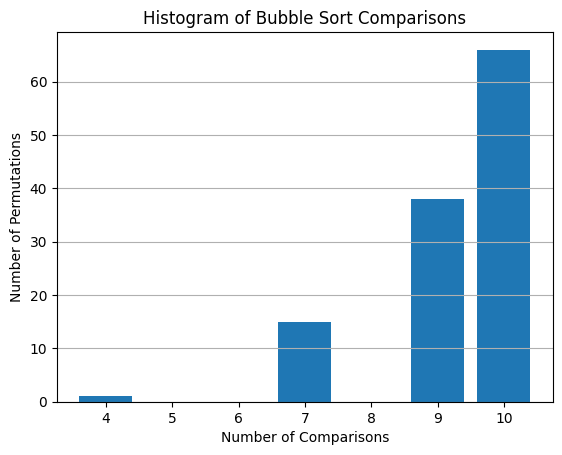

In [387]:
plt.hist(comparison_counts, bins=range(4, 12), align='left', rwidth=0.8)
plt.xlabel('Number of Comparisons')
plt.ylabel('Number of Permutations')
plt.title('Histogram of Bubble Sort Comparisons')
plt.grid(axis='y')
plt.show()